
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!


## Imports
*Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

## Get the Data

*Read in the Ecommerce Customers csv file as a DataFrame called customers.*

In [4]:
df = pd.read_csv('Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [9]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [13]:
df.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

## Exploratory Data Analysis

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

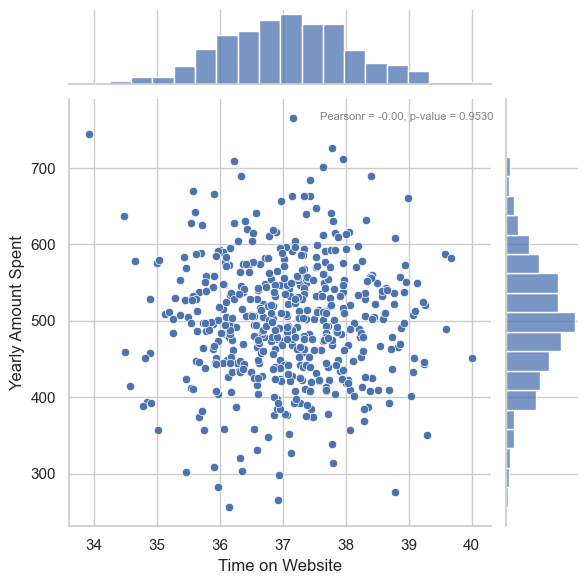

In [31]:
sns.set(style="whitegrid")

# Create a jointplot
joint_plot = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on Website'], df['Yearly Amount Spent'])

# Annotate the plot with Pearson correlation coefficient and p-value (smaller font)
joint_plot.ax_joint.annotate(
    f"Pearsonr = {pearson_corr:.2f}, p-value = {p_value:.4f}",
    xy=(0.8, 0.95),
    xycoords='axes fraction',
    ha='center',
    fontsize=8,
    color='gray'
)

plt.show()

**Do the same but with the Time on App column instead. **

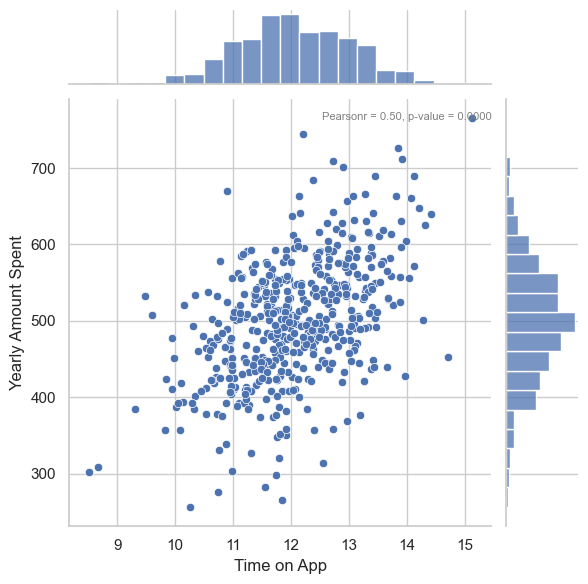

In [33]:
sns.set(style="whitegrid")

# Create a jointplot
joint_plot = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on App'], df['Yearly Amount Spent'])

# Annotate the plot with Pearson correlation coefficient and p-value (smaller font)
joint_plot.ax_joint.annotate(
    f"Pearsonr = {pearson_corr:.2f}, p-value = {p_value:.4f}",
    xy=(0.8, 0.95),
    xycoords='axes fraction',
    ha='center',
    fontsize=8,
    color='gray'
)

plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

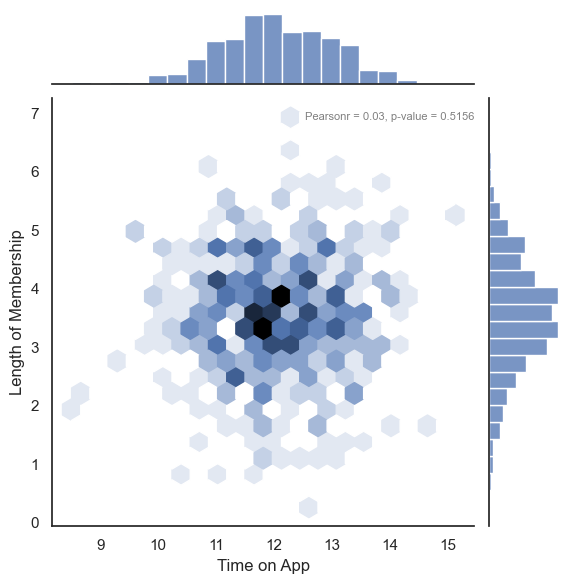

In [38]:
sns.set(style="white")

# Create a jointplot
joint_plot = sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=df)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df['Time on App'], df['Length of Membership'])

# Annotate the plot with Pearson correlation coefficient and p-value (smaller font)
joint_plot.ax_joint.annotate(
    f"Pearsonr = {pearson_corr:.2f}, p-value = {p_value:.4f}",
    xy=(0.8, 0.95),
    xycoords='axes fraction',
    ha='center',
    fontsize=8,
    color='gray'
)

plt.show()

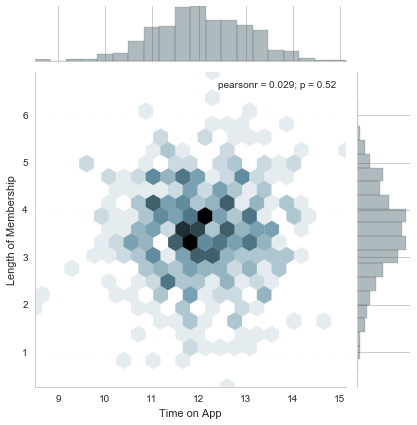

**Use pairplot** 

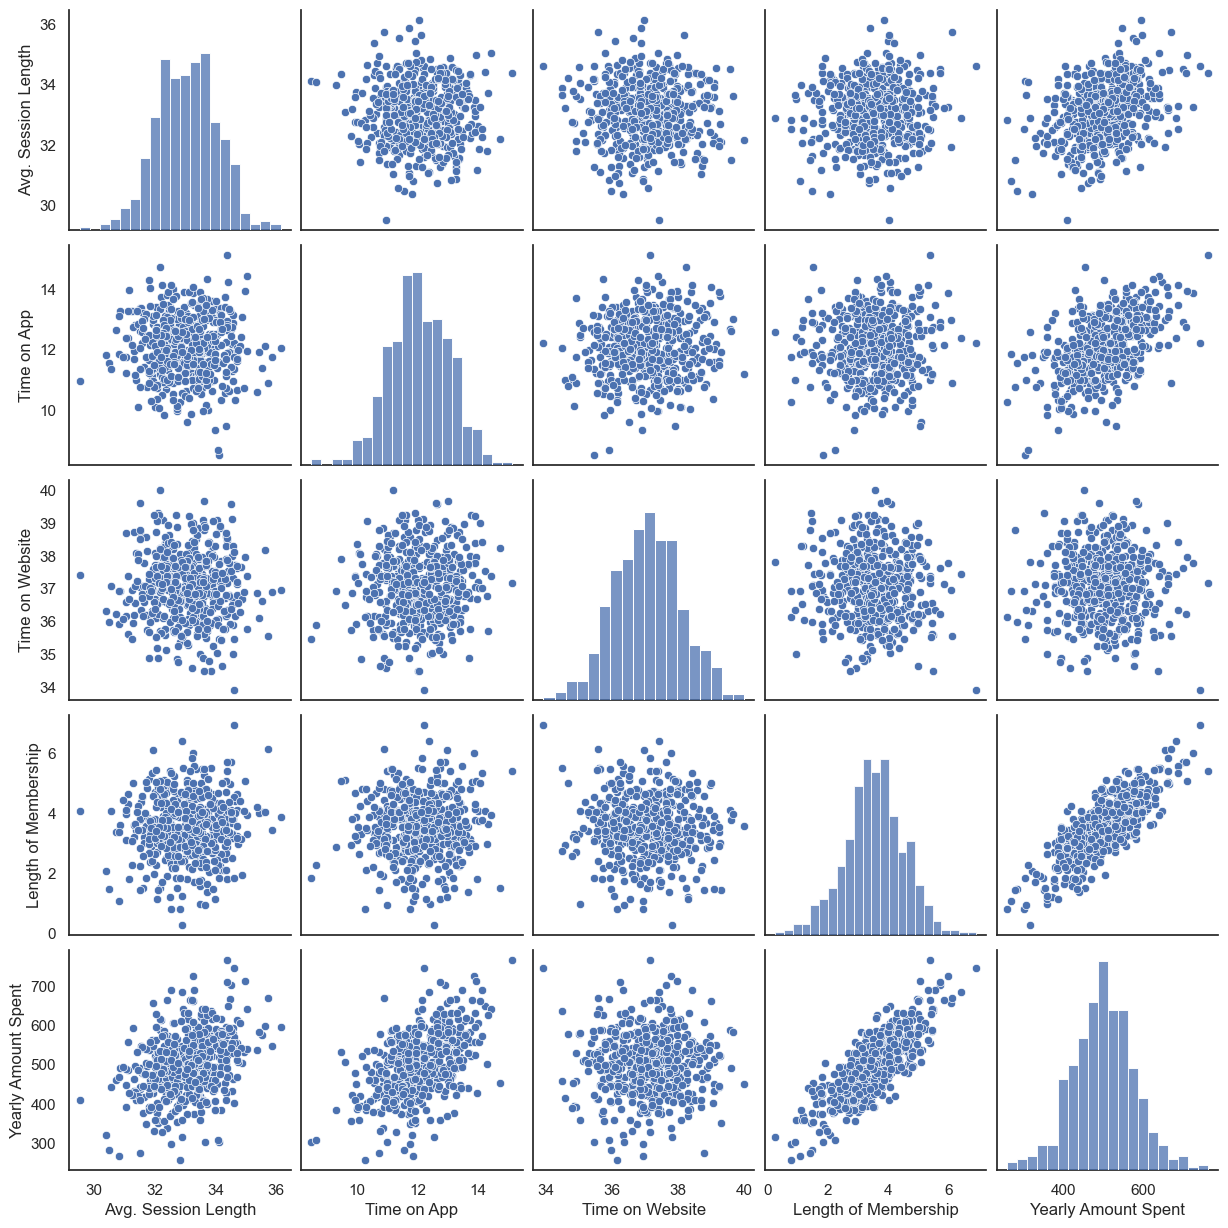

In [39]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

* Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

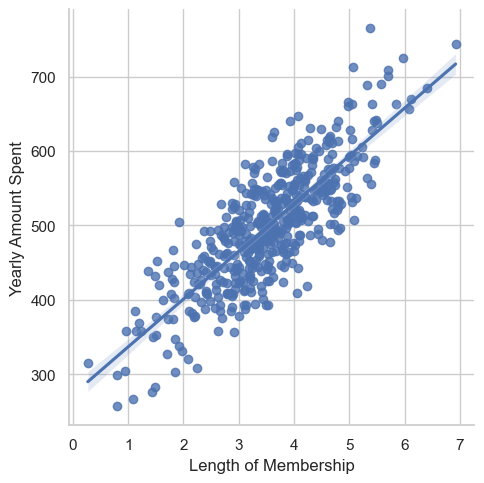

In [40]:
sns.set_style("whitegrid")
# Create a linear model plot
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.show()

## Training and Testing Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Extract numerical features (X)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
# Extract the target variable (y)
y = df['Yearly Amount Spent']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Training the Model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Create an instance of LinearRegression
lm = LinearRegression()

In [10]:
# Train the LinearRegression model on the training data
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [49]:
X.columns, lm.coef_

(Index(['Avg. Session Length', 'Time on App', 'Time on Website',
        'Length of Membership'],
       dtype='object'),
 array([25.88395636, 38.51520571,  0.57510724, 61.49017177]))

## Predicting Test Data

In [51]:
y_pred = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

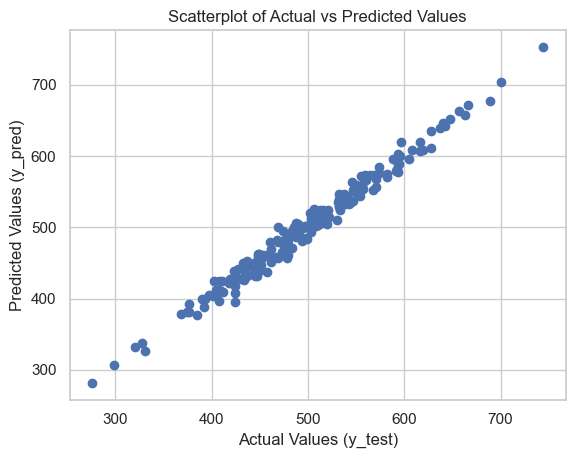

In [52]:
# Create a scatterplot
plt.scatter(y_test, y_pred)

# Add labels and a title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatterplot of Actual vs Predicted Values")

# Show the plot
plt.show()

## Evaluating the Model


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 8.2482
Mean Squared Error (MSE): 99.7407
Root Mean Squared Error (RMSE): 9.9870


## Residuals

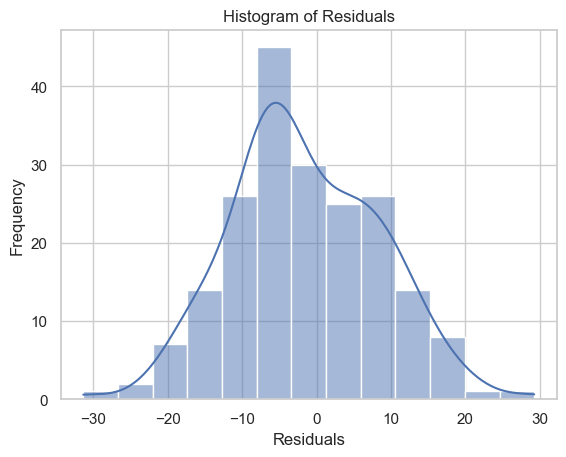

In [54]:
# Calculate residuals
residuals = y_test - y_pred

# Plot a histogram of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

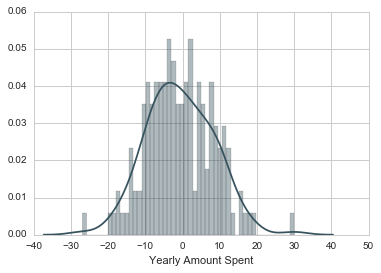

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [60]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lm.coef_
})
coefficients_df

,Feature,Coefficient
0,Avg. Session Length,25.883956
1,Time on App,38.515206
2,Time on Website,0.575107
3,Length of Membership,61.490172


**How can you interpret these coefficients?**

* *The "Time on App" has a higher impact on the "Yearly Amount Spent" compared to the "Time on Website."*

* *The "Length of Membership" has the most significant impact, suggesting that customer loyalty, represented by the length of membership, has a substantial positive influence on the amount spent yearly.*

* *The "Avg. Session Length" also contributes positively but to a lesser extent compared to "Time on App" and "Length of Membership."*

**Do you think the company should focus more on their mobile app or on their website?**

* *the company may benefit from focusing on both the mobile app and website, with a potential emphasis on optimizing the mobile app experience. Additionally, strategies to enhance customer loyalty, such as personalized offers and engagement programs, could contribute to increased Yearly Amount Spent.*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.